1. What is unsupervised learning in the context of machine learning? Unsupervised learning is a type of machine learning where the model identifies patterns in data without predefined labels. Unlike supervised learning, where models are trained on labeled data with known outputs, unsupervised learning allows the algorithm to explore data structure freely. Common applications include clustering, anomaly detection, and dimensionality reduction.

2. K-Means clustering is an iterative algorithm that partitions a dataset into
𝑘
 clusters. It follows these steps:

Initialize
𝑘
 centroids randomly.

Assign each data point to the nearest centroid based on distance (usually Euclidean distance).

Compute new centroids by taking the mean of all points within each cluster.

Repeat the assignment and centroid update process until centroids stabilize or a stopping condition is met. The algorithm is efficient but sensitive to the initial centroid placement, which is improved by K-Means++.

3. A dendrogram is a tree-like diagram used to visualize the clustering hierarchy in hierarchical clustering methods. It shows how clusters are merged (agglomerative clustering) or split (divisive clustering). The vertical axis represents distance or similarity, and cutting the dendrogram at different levels allows selection of an appropriate number of clusters.

4. K-Means: Requires pre-defining the number of clusters; partitions data into non-overlapping clusters; works best for spherical clusters.

Hierarchical Clustering: Does not require specifying cluster numbers; builds a hierarchy of clusters; can be divisive or agglomerative.

5. DBSCAN does not require pre-specifying the number of clusters.

Can find clusters of arbitrary shapes, unlike K-Means which assumes spherical clusters.

Identifies noise points that do not belong to any cluster.

Works well with varying cluster densities.

6. The Silhouette Score evaluates clustering quality by measuring how well-separated clusters are. It compares the average distance between a data point and other points in its cluster versus the nearest neighboring cluster. A higher score (closer to 1) indicates better separation, while a negative score suggests poor clustering.

7.
Computational cost is high, especially with large datasets.

Cannot reassign points once merged.

Sensitive to noise and outliers.

Requires choosing an appropriate linkage criterion.

8. Feature scaling ensures that numerical differences do not disproportionately affect distance calculations. Without scaling, features with larger numerical values dominate the clustering process. Methods like standardization (z-score normalization) or min-max normalization are commonly used.

9. DBSCAN classifies points into three categories:

Core points: Have a sufficient number of neighbors within the defined radius
𝜖
.

Border points: Close to core points but have fewer neighbors than the threshold.

Noise points: Do not belong to any cluster and remain isolated.

10. Inertia measures how tightly data points are grouped around their centroids. It is calculated as the sum of squared distances from each data point to its assigned centroid. Lower inertia indicates better clustering, but too low inertia may indicate overfitting.

11. The elbow method helps determine the optimal number of clusters by plotting inertia against the number of clusters. The ideal
𝑘
 is the point where inertia reduction slows, forming an "elbow" in the graph.

12. Density in DBSCAN is defined by the number of points within a given radius
𝜖
. A region with enough points forms a dense area, creating a cluster. Sparse areas are labeled as noise.

13. Yes, hierarchical clustering can be used for categorical data by utilizing appropriate distance measures such as Jaccard similarity or Hamming distance.

14. A negative Silhouette Score suggests that a data point is likely misclassified—it is closer to a neighboring cluster than to its own assigned cluster.

15. Linkage criteria define how distances between clusters are measured:

Single linkage: Uses the shortest distance between any two points.

Complete linkage: Uses the farthest distance.

Average linkage: Uses the average pairwise distance.

Ward’s method: Minimizes variance within clusters.

16. K-Means assumes clusters are spherical and evenly sized. If the dataset has clusters with different shapes, sizes, or densities, K-Means may misclassify points or create poor cluster separations.

17. 𝜖
 (eps): Defines the neighborhood radius.

MinPts: Minimum number of points required to form a dense region. Higher
𝜖
 leads to larger clusters, while increasing MinPts makes it harder to form clusters.

18.  K-Means++ selects initial centroids strategically to spread them apart, reducing the likelihood of poor convergence.

19.  Agglomerative clustering is a hierarchical clustering method that starts with individual points and iteratively merges the closest clusters.

20. While inertia only measures within-cluster compactness, Silhouette Score considers both intra-cluster cohesion and inter-cluster separation, making it a more comprehensive evaluation metric.

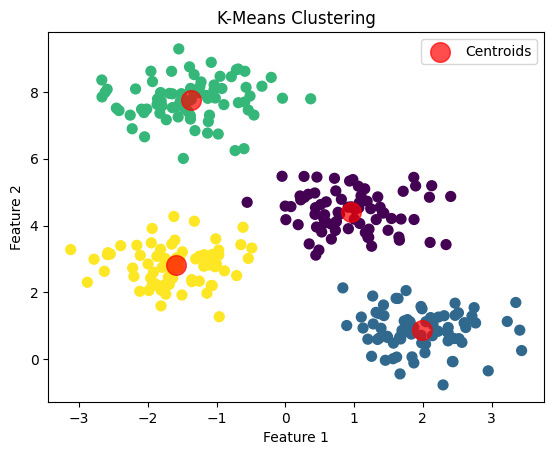

In [1]:
# prompt: Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
# scatter plot

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 4 centers
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters and their centroids
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [2]:
# prompt:  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
# predicted labels

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)

# Get the predicted labels
predicted_labels = agg_clustering.labels_

# Display the first 10 predicted labels
print(predicted_labels[:10])

[1 1 1 1 1 1 1 1 1 1]


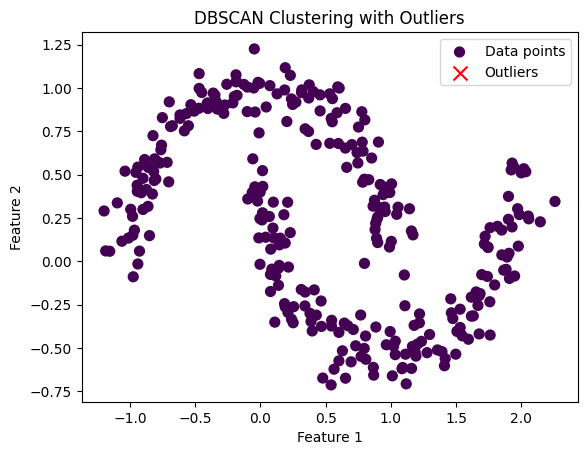

In [3]:
# prompt:  Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# Generate synthetic data using make_moons
X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Identify outliers (points with label -1)
outliers = X[clusters == -1]

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', s=50, label='Data points')

# Highlight outliers
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', marker='x', s=100, label='Outliers')

plt.title('DBSCAN Clustering with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [4]:
# prompt:  Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
# cluster

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data

# Standardize the features
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

# Apply K-Means clustering
kmeans_wine = KMeans(n_clusters=3, random_state=42) # Wine dataset has 3 classes
kmeans_wine.fit(X_wine_scaled)
y_kmeans_wine = kmeans_wine.predict(X_wine_scaled)

# Calculate the size of each cluster
cluster_sizes = {}
for cluster_label in np.unique(y_kmeans_wine):
    size = np.sum(y_kmeans_wine == cluster_label)
    cluster_sizes[cluster_label] = size

# Print the size of each cluster
print("Size of each cluster:")
for cluster_label, size in cluster_sizes.items():
    print(f"Cluster {cluster_label}: {size} samples")


Size of each cluster:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


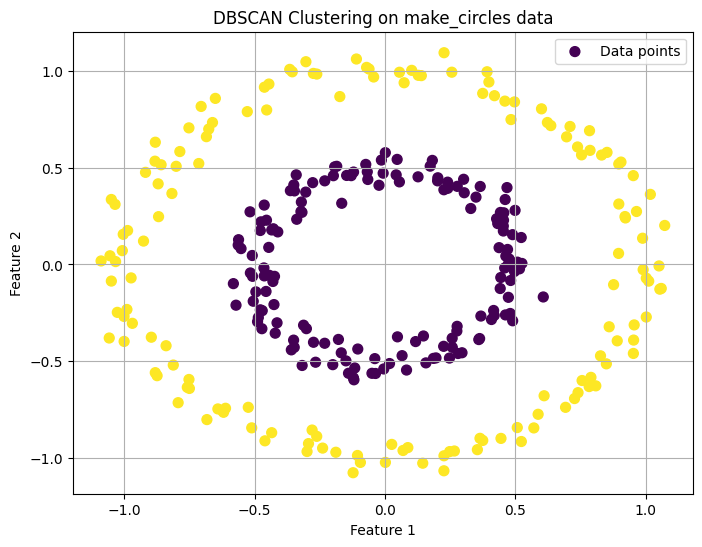

In [5]:
# prompt:  Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Generate synthetic data using make_circles
X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=0)

# Apply DBSCAN
# Adjust eps and min_samples based on the dataset
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

# Identify outliers (points with label -1)
outliers = X[clusters == -1]

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', s=50, label='Data points')

# Highlight outliers if any
if outliers.shape[0] > 0:
    plt.scatter(outliers[:, 0], outliers[:, 1], color='red', marker='x', s=100, label='Outliers')

plt.title('DBSCAN Clustering on make_circles data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# prompt:  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
# centroids

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data

# Apply MinMaxScaler
scaler_bc = MinMaxScaler()
X_bc_scaled = scaler_bc.fit_transform(X_bc)

# Apply K-Means clustering with 2 clusters
kmeans_bc = KMeans(n_clusters=2, random_state=42, n_init=10) # n_init explicitly set to 10
kmeans_bc.fit(X_bc_scaled)

# Output the cluster centroids
print("Cluster Centroids (after MinMaxScaler):")
kmeans_bc.cluster_centers_


Cluster Centroids (after MinMaxScaler):


array([[0.50483563, 0.39560329, 0.50578661, 0.36376576, 0.46988732,
        0.42226302, 0.41838662, 0.46928035, 0.45899738, 0.29945886,
        0.19093085, 0.19112073, 0.17903433, 0.13086432, 0.18017962,
        0.25890126, 0.12542475, 0.30942779, 0.190072  , 0.13266975,
        0.48047448, 0.45107371, 0.4655302 , 0.31460597, 0.49868817,
        0.36391461, 0.39027292, 0.65827197, 0.33752296, 0.26041387],
       [0.25535358, 0.28833455, 0.24696416, 0.14388369, 0.35743076,
        0.18019471, 0.10344776, 0.1306603 , 0.34011829, 0.25591606,
        0.06427485, 0.18843043, 0.05975663, 0.02870108, 0.18158628,
        0.13242941, 0.05821528, 0.18069336, 0.17221057, 0.08403996,
        0.2052406 , 0.32069002, 0.19242138, 0.09943446, 0.3571115 ,
        0.14873935, 0.13142287, 0.26231363, 0.22639412, 0.15437354]])

<ipython-input-7-b3e3c55ef1c6>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(np.unique(clusters)) - (1 if -1 in clusters else 0))


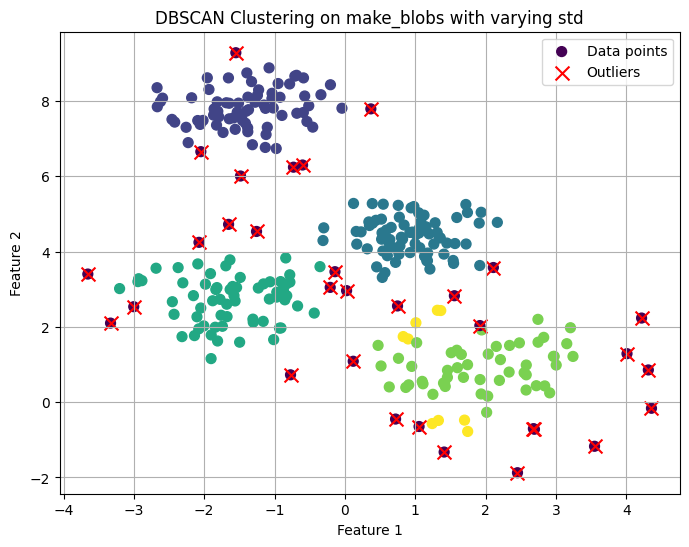

In [7]:
# prompt: Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
# DBSCAN

# Generate synthetic data using make_blobs with varying cluster standard deviations
X, y = make_blobs(n_samples=300, centers=4, cluster_std=[0.5, 1.0, 0.8, 0.6], random_state=0)

# Apply DBSCAN to the generated data
# You may need to tune eps and min_samples based on the data
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Identify outliers (points with label -1)
outliers = X[clusters == -1]

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
# Use a colormap that includes a distinct color for outliers (-1)
cmap = plt.cm.get_cmap('viridis', len(np.unique(clusters)) - (1 if -1 in clusters else 0))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap=cmap, marker='o', s=50, label='Data points')

# Highlight outliers if any
if outliers.shape[0] > 0:
    plt.scatter(outliers[:, 0], outliers[:, 1], color='red', marker='x', s=100, label='Outliers')

plt.title('DBSCAN Clustering on make_blobs with varying std')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

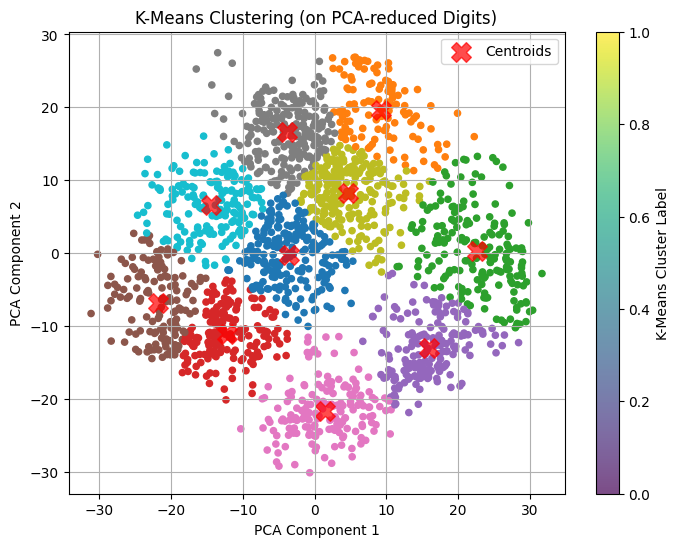

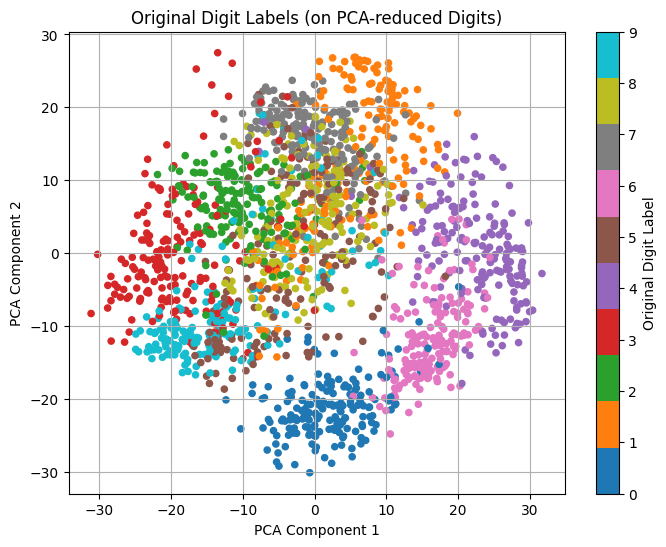

In [8]:
# prompt:  Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target # We'll use the original labels for coloring in visualization

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering to the reduced data
# Since we know there are 10 digits (0-9), we expect 10 clusters
kmeans_digits = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_digits.fit(X_pca)
y_kmeans_digits = kmeans_digits.predict(X_pca)

# Visualize the clusters from K-Means
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_digits, s=20, cmap='tab10') # Using K-Means labels
centers = kmeans_digits.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroids')
plt.title('K-Means Clustering (on PCA-reduced Digits)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.colorbar(label='K-Means Cluster Label')
plt.grid(True)
plt.show()

# Optional: Visualize colored by the original labels for comparison
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='tab10') # Using original labels
plt.title('Original Digit Labels (on PCA-reduced Digits)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Original Digit Label')
plt.grid(True)
plt.show()

Silhouette score for k=2: 0.5426
Silhouette score for k=3: 0.5890
Silhouette score for k=4: 0.6820
Silhouette score for k=5: 0.5924


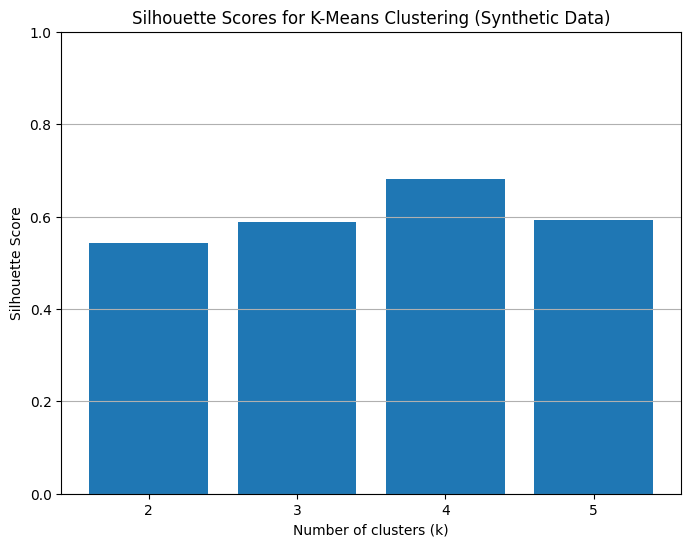

In [9]:
# prompt:  Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

from sklearn.metrics import silhouette_score

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

silhouette_scores = []
k_values = range(2, 6)  # K from 2 to 5

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")

# Display as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering (Synthetic Data)')
plt.xticks(k_values)
plt.ylim(0, 1) # Silhouette scores are between -1 and 1, but usually positive for good clusters
plt.grid(axis='y')
plt.show()


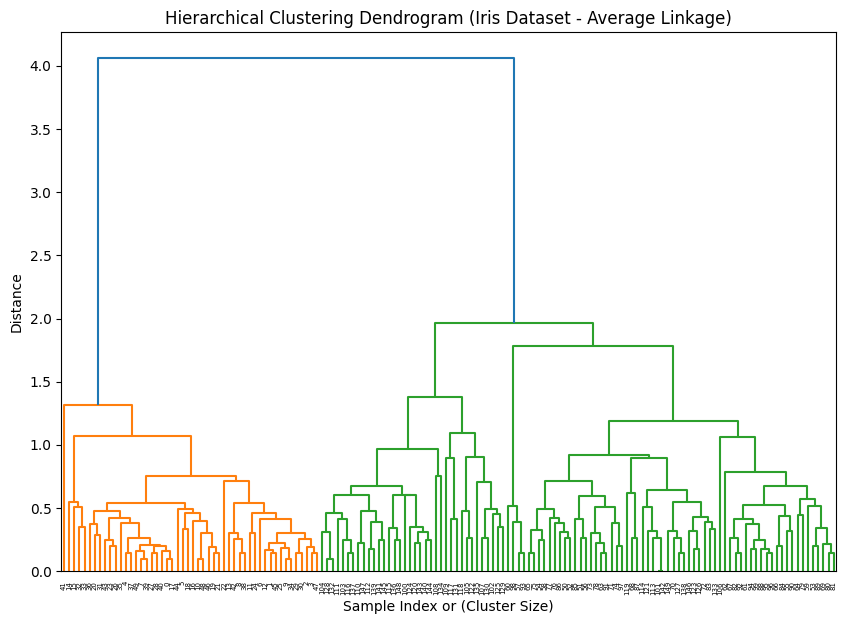

In [10]:
# prompt:  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering using average linkage
linked = linkage(X, 'average')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset - Average Linkage)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

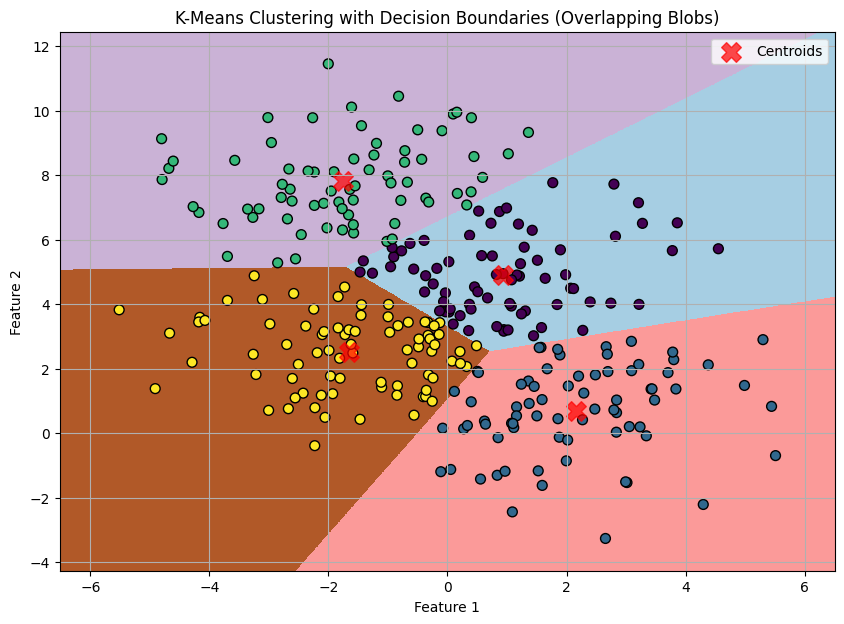

In [11]:
# prompt:  Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
# decision boundaries

# Generate synthetic data with overlapping clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Create a meshgrid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict cluster for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points
plt.figure(figsize=(10, 7))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids', marker='X')

plt.title('K-Means Clustering with Decision Boundaries (Overlapping Blobs)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 83.9 MB/s eta 0:00:00


<ipython-input-12-5250c3684764>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', n_clusters_ + 1)


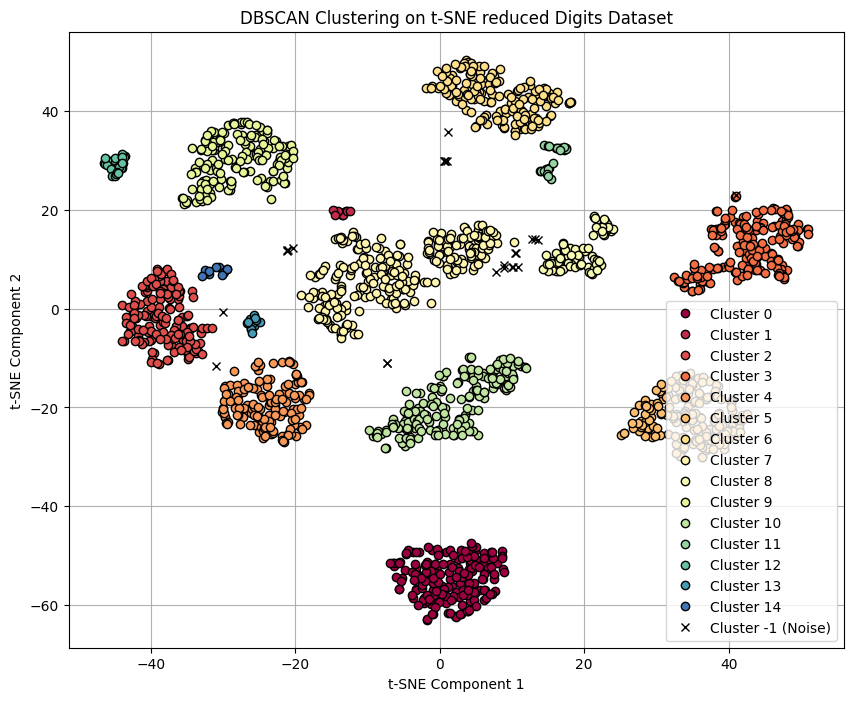

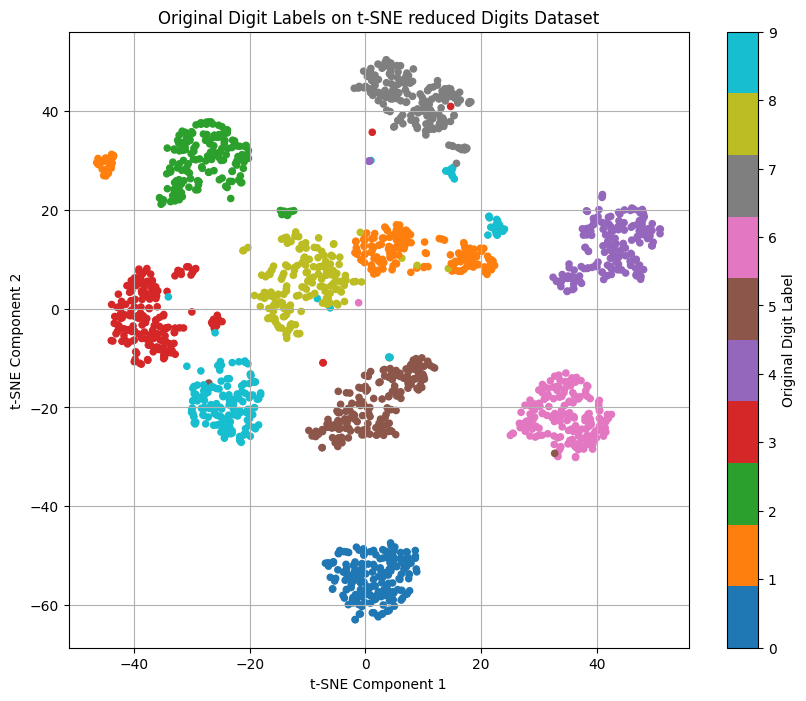

In [12]:
# prompt:  Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

!pip install -q scikit-learn matplotlib openml

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target # Original labels for verification/comparison later

# Reduce dimensions using t-SNE
# Choose n_components=2 for visualization in 2D
# Perplexity and n_iter are important parameters to tune for t-SNE
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X)

# Apply DBSCAN to the t-SNE reduced data
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
# These parameters often require tuning based on the dataset and the t-SNE output.
dbscan = DBSCAN(eps=3, min_samples=10) # Example parameters, tune as needed
clusters = dbscan.fit_predict(X_tsne)

# Identify outliers (points with label -1)
outliers = X_tsne[clusters == -1]

# Plot the t-SNE reduced data colored by DBSCAN clusters
plt.figure(figsize=(10, 8))

# Use a colormap that includes a distinct color for outliers (-1)
unique_clusters = np.unique(clusters)
n_clusters_ = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

# Create a colormap with enough colors for clusters + one for outliers
cmap = plt.cm.get_cmap('tab10', n_clusters_ + 1)

# Plot non-outliers
core_samples_mask = np.zeros_like(clusters, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = clusters

# Black removes noise points
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        # Plot outliers with a distinct marker (e.g., 'x')
        class_member_mask = (labels == k)
        xy = X_tsne[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'x', markerfacecolor=tuple(col),
                 markeredgecolor=tuple(col), markersize=6, label=f'Cluster {k} (Noise)')
    else:
        # Plot core points and border points for clusters
        class_member_mask = (labels == k)
        xy = X_tsne[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6, label=f'Cluster {k}')


plt.title('DBSCAN Clustering on t-SNE reduced Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()

# You can also visualize colored by the original digit labels on the t-SNE data for comparison
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=20, cmap='tab10')
plt.title('Original Digit Labels on t-SNE reduced Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Original Digit Label')
plt.grid(True)
plt.show()

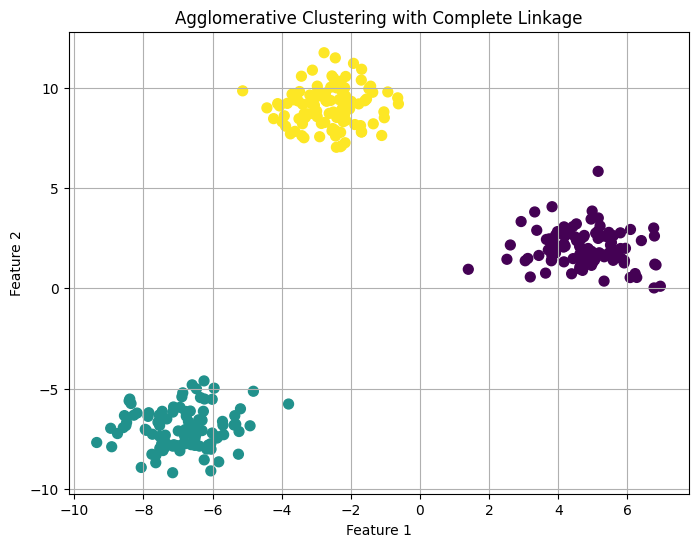

In [13]:
# prompt: Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
# the result

# Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply Agglomerative Clustering with complete linkage
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
agg_clustering.fit(X)

# Get the predicted labels
predicted_labels = agg_clustering.labels_

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=50, cmap='viridis')
plt.title('Agglomerative Clustering with Complete Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

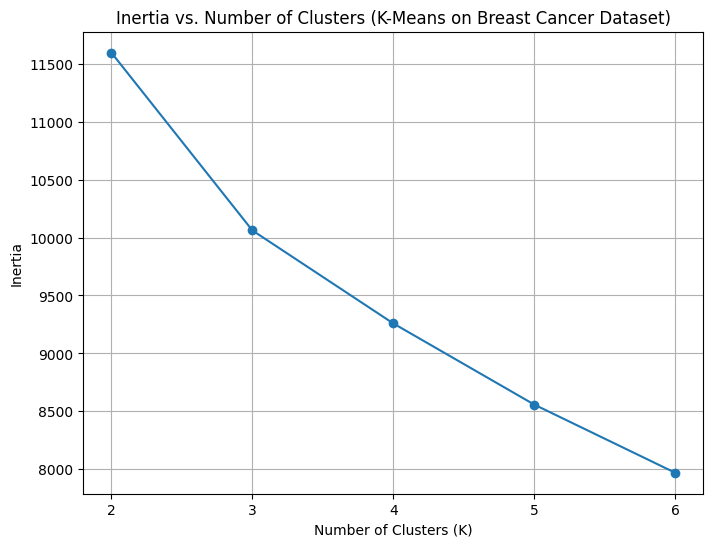

In [14]:
# prompt: Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
# line plot

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bc)

# Calculate inertia for K values from 2 to 6
inertia_values = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Inertia vs. Number of Clusters (K-Means on Breast Cancer Dataset)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

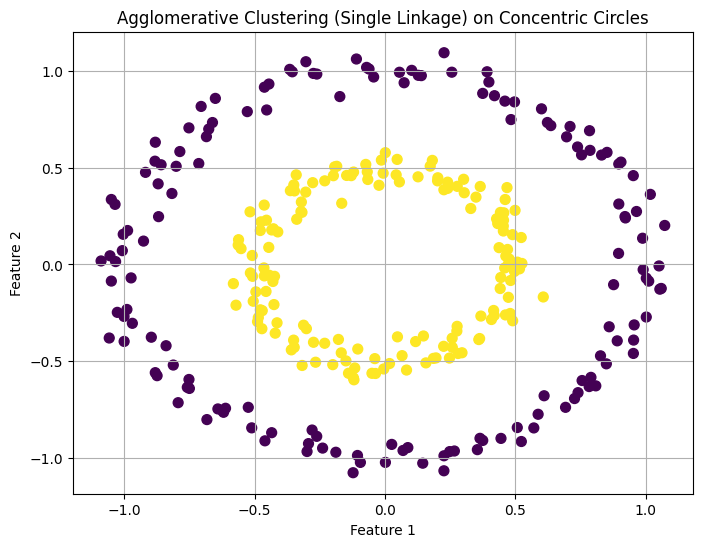

In [15]:
# prompt: Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
# single linkage

# Generate synthetic concentric circles
X_circles, y_circles = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=0)

# Apply Agglomerative Clustering with single linkage
# Set n_clusters based on the expected number of circles (usually 2)
agg_clustering_circles = AgglomerativeClustering(n_clusters=2, linkage='single')
agg_clustering_circles.fit(X_circles)

# Get the predicted labels
predicted_labels_circles = agg_clustering_circles.labels_

# Plot the result
plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=predicted_labels_circles, s=50, cmap='viridis')
plt.title('Agglomerative Clustering (Single Linkage) on Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [16]:
# prompt: Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
# noise)

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data

# Standardize the features
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

# Apply DBSCAN
# You will likely need to tune eps and min_samples for this dataset
dbscan = DBSCAN(eps=0.5, min_samples=5) # Example parameters, tune as needed
clusters = dbscan.fit_predict(X_wine_scaled)

# Count the number of clusters (excluding noise, which is labeled as -1)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

print(f"Number of clusters found by DBSCAN (excluding noise): {n_clusters}")

# Optional: Print the distribution of points across clusters and noise
unique_labels, counts = np.unique(clusters, return_counts=True)
print("\nCluster distribution:")
for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"Noise points (-1): {count}")
    else:
        print(f"Cluster {label}: {count}")

Number of clusters found by DBSCAN (excluding noise): 0

Cluster distribution:
Noise points (-1): 178


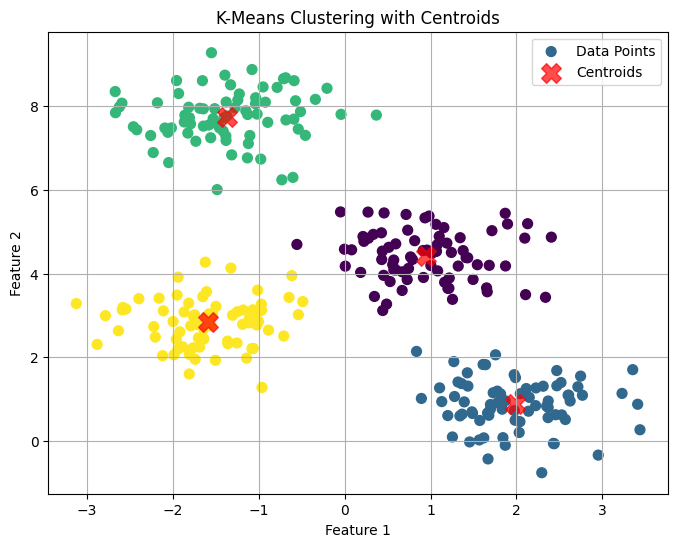

In [17]:
# prompt: Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
# data points

# Generate synthetic data with 4 centers
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10) # Explicitly set n_init
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters and their centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroids')

plt.title('K-Means Clustering with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

Number of samples identified as noise by DBSCAN: 17


<ipython-input-18-00b264f04e0f>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters_ + 1)


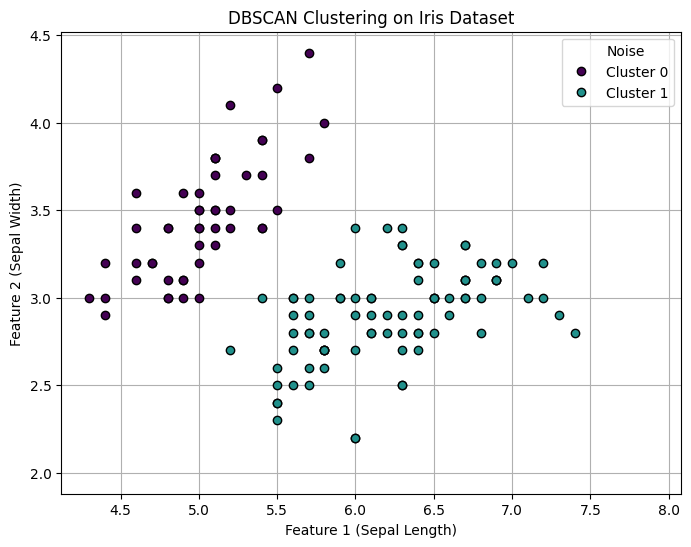

In [18]:
# prompt: Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply DBSCAN to the Iris dataset
# These parameters often require tuning based on the dataset
dbscan = DBSCAN(eps=0.5, min_samples=5) # Example parameters, tune as needed
clusters = dbscan.fit_predict(X)

# Count the number of samples identified as noise (label -1)
noise_samples_count = np.sum(clusters == -1)

print(f"Number of samples identified as noise by DBSCAN: {noise_samples_count}")

# Optional: Plot the clustering result to visualize noise points
plt.figure(figsize=(8, 6))

# Use a colormap that includes a distinct color for noise (-1)
unique_clusters = np.unique(clusters)
n_clusters_ = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

# Create a colormap with enough colors for clusters + one for outliers
cmap = plt.cm.get_cmap('viridis', n_clusters_ + 1)

# Plot points with cluster assignments and noise
for k in unique_clusters:
    if k == -1:
        # Plot noise points with a distinct color and marker
        color = 'black'
        marker = 'x'
        label = 'Noise'
    else:
        # Plot cluster points
        color = cmap(k) # Use colormap for clusters
        marker = 'o'
        label = f'Cluster {k}'

    class_member_mask = (clusters == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=color,
             markeredgecolor='k' if k != -1 else 'none', markersize=6, label=label)

plt.title('DBSCAN Clustering on Iris Dataset')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.legend()
plt.grid(True)
plt.show()

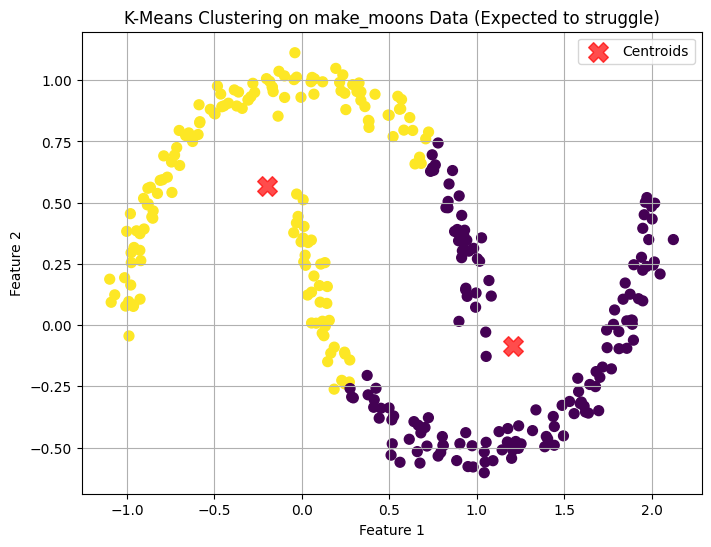

In [19]:
# prompt:  Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
# clustering result

# Generate synthetic non-linearly separable data using make_moons
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

# Apply K-Means clustering
# K-Means typically struggles with non-linearly separable data like make_moons
# Let's try with n_clusters=2 (knowing the data comes from two "moons") to see its limitation
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Optionally, visualize the centroids (though less meaningful for non-linear data)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroids')

plt.title('K-Means Clustering on make_moons Data (Expected to struggle)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Note: As expected, K-Means divides the data linearly, failing to capture the moon shapes.
# This example demonstrates why density-based methods like DBSCAN are often better for such data.

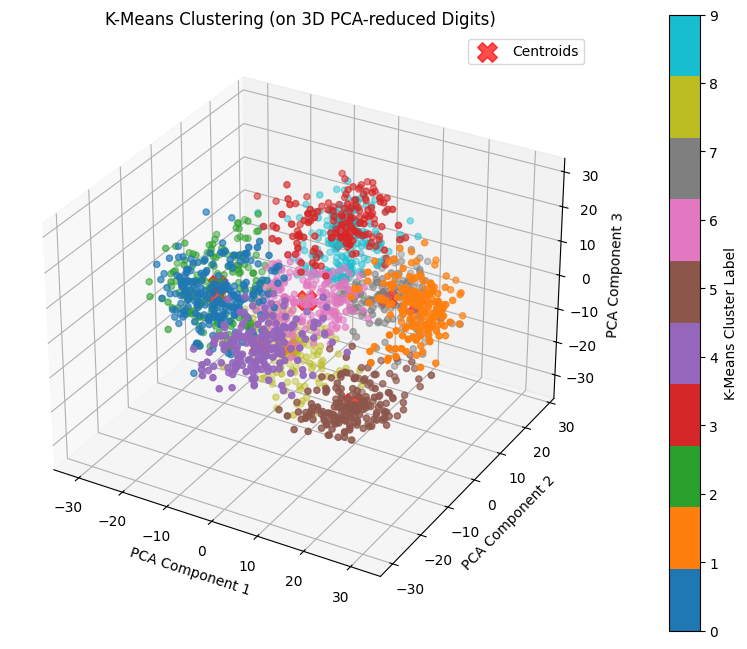

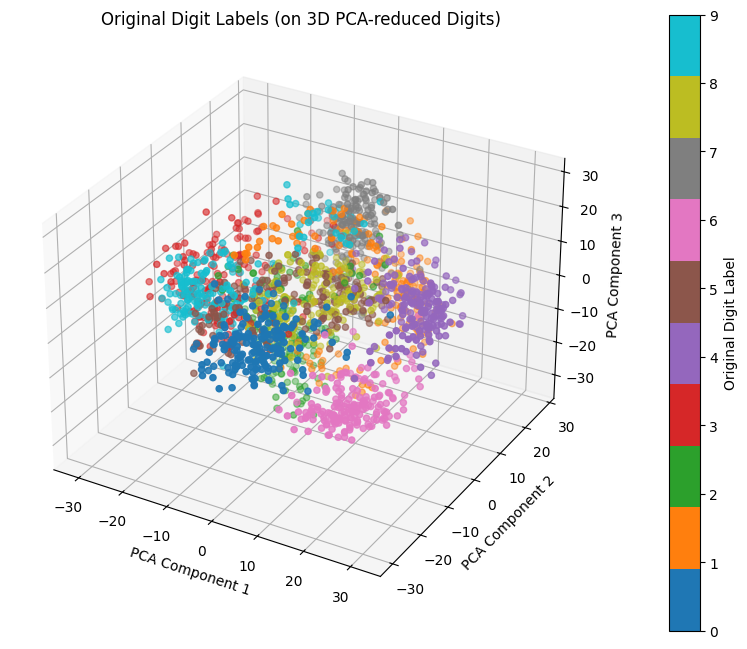

In [20]:
# prompt:  Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
# scatter plot.

from mpl_toolkits.mplot3d import Axes3D

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target # Original labels for visualization comparison

# Reduce the data to 3 dimensions using PCA
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering to the 3D reduced data
# We know there are 10 digits (0-9), so we expect 10 clusters
kmeans_digits_3d = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_digits_3d.fit(X_pca)
y_kmeans_digits_3d = kmeans_digits_3d.predict(X_pca)
centers_3d = kmeans_digits_3d.cluster_centers_

# Visualize the clusters with a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points colored by their K-Means cluster labels
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_kmeans_digits_3d, s=20, cmap='tab10')

# Plot the centroids
ax.scatter(centers_3d[:, 0], centers_3d[:, 1], centers_3d[:, 2], c='red', s=200, alpha=0.7, marker='X', label='Centroids')

ax.set_title('K-Means Clustering (on 3D PCA-reduced Digits)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('K-Means Cluster Label')

plt.legend()
plt.show()

# Optional: Visualize the original labels in 3D for comparison
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter_original = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, s=20, cmap='tab10')

ax.set_title('Original Digit Labels (on 3D PCA-reduced Digits)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a color bar for original labels
cbar_original = fig.colorbar(scatter_original, ax=ax, pad=0.1)
cbar_original.set_label('Original Digit Label')

plt.show()

Silhouette score for KMeans with 5 clusters: 0.6757


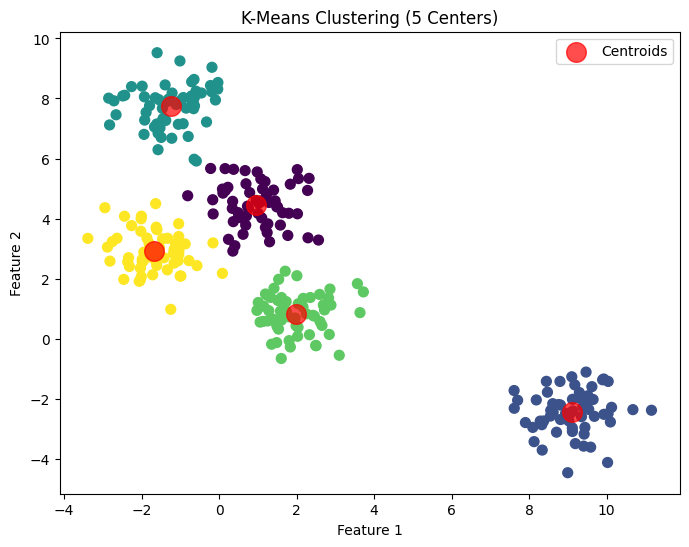

In [21]:
# prompt: Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
# clustering

# Generate synthetic data with 5 centers
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.70, random_state=0)

# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate the silhouette score
score = silhouette_score(X, y_kmeans)

print(f"Silhouette score for KMeans with 5 clusters: {score:.4f}")

# Optional: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('K-Means Clustering (5 Centers)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

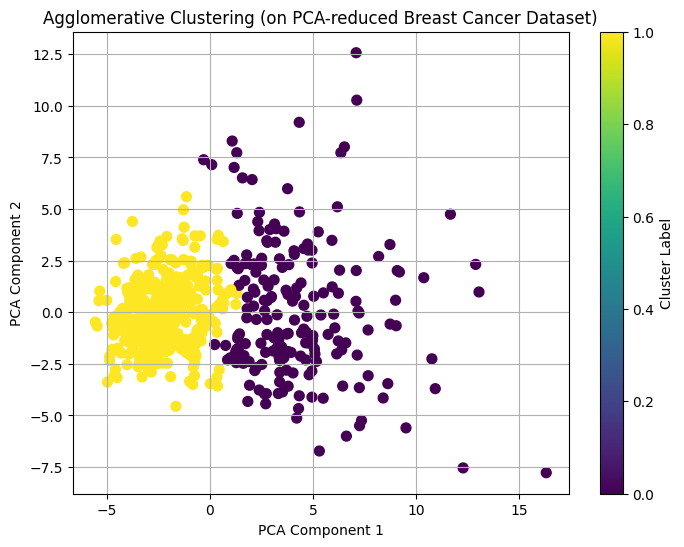

In [22]:
# prompt:  Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
# Visualize in 2D

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bc)

# Reduce dimensionality using PCA to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering to the PCA-reduced data
# The Breast Cancer dataset has two classes (malignant and benign), so we set n_clusters=2
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X_pca)

# Get the predicted labels from Agglomerative Clustering
predicted_labels = agg_clustering.labels_

# Visualize the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, s=50, cmap='viridis')

plt.title('Agglomerative Clustering (on PCA-reduced Breast Cancer Dataset)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

<ipython-input-23-fd344f064254>:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_dbscan = plt.cm.get_cmap('viridis', n_clusters_dbscan + 1)


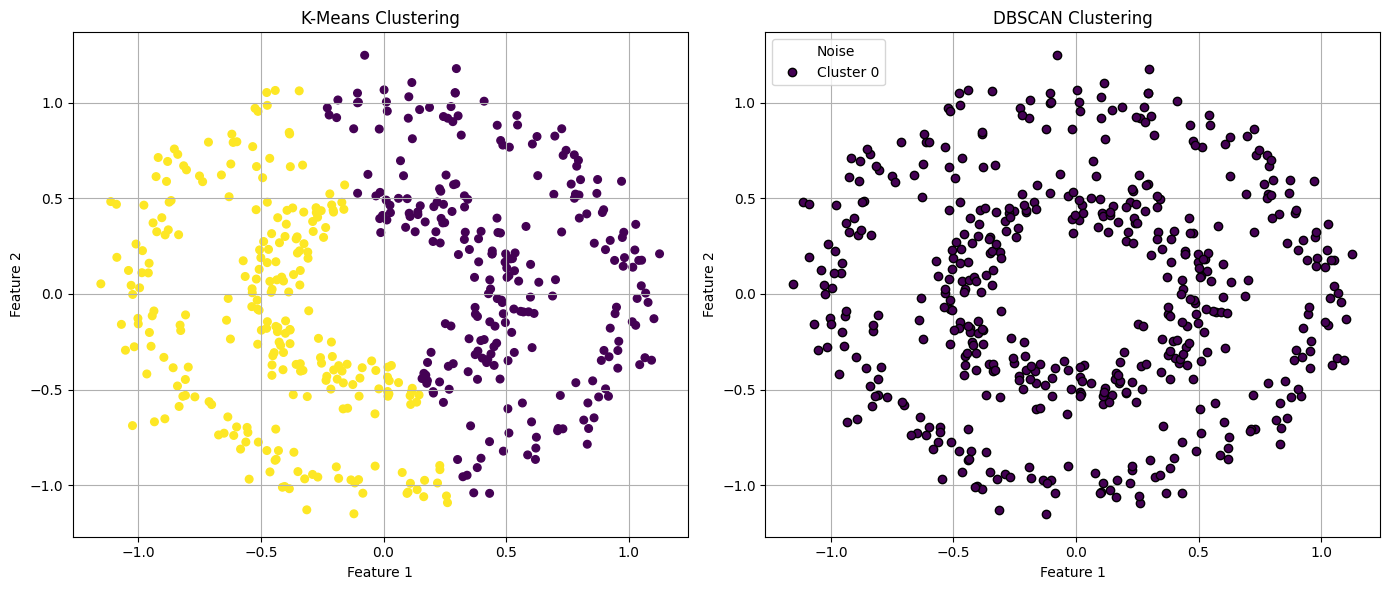

In [23]:
# prompt: Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
# side-by-side

# Generate noisy concentric circles
X_circles, y_circles = make_circles(n_samples=500, noise=0.08, factor=0.5, random_state=42)

# Apply K-Means clustering
# K-Means often struggles with circle shapes
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_circles)
y_kmeans_circles = kmeans.predict(X_circles)

# Apply DBSCAN clustering
# DBSCAN is generally better for finding clusters of arbitrary shapes
# You might need to tune eps and min_samples based on the noise level
dbscan = DBSCAN(eps=0.2, min_samples=10) # Example parameters, tune as needed
clusters_dbscan = dbscan.fit_predict(X_circles)

# Create a figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot K-Means results
axes[0].scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans_circles, s=30, cmap='viridis')
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True)

# Plot DBSCAN results
# Use a colormap that includes a distinct color for noise (-1)
unique_clusters_dbscan = np.unique(clusters_dbscan)
n_clusters_dbscan = len(unique_clusters_dbscan) - (1 if -1 in unique_clusters_dbscan else 0)
cmap_dbscan = plt.cm.get_cmap('viridis', n_clusters_dbscan + 1)

for k in unique_clusters_dbscan:
    if k == -1:
        # Plot noise points
        color = 'black'
        marker = 'x'
        label = 'Noise'
        size = 50
    else:
        # Plot cluster points
        color = cmap_dbscan(k)
        marker = 'o'
        label = f'Cluster {k}'
        size = 30

    class_member_mask = (clusters_dbscan == k)
    xy = X_circles[class_member_mask]
    axes[1].plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=color,
             markeredgecolor='k' if k != -1 else 'none', markersize=size/5, label=label)


axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True)
axes[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

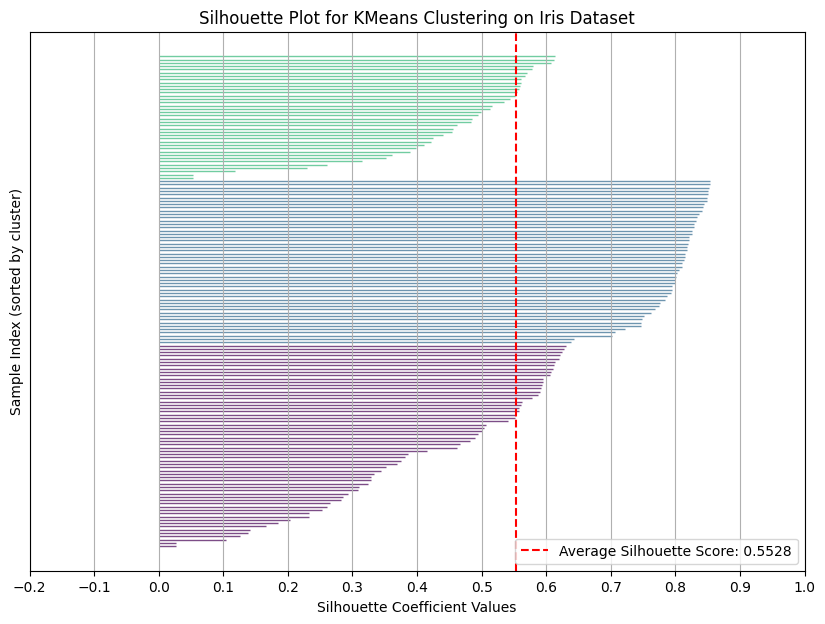

Average Silhouette Score for KMeans on Iris: 0.5528


In [25]:
# prompt:  Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

# Load the Iris dataset
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples # Import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data

# Apply K-Means clustering
# Let's use 3 clusters, corresponding to the known classes in Iris
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Explicitly set n_init
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Calculate the Silhouette Score for each sample
silhouette_per_sample = silhouette_samples(X, y_kmeans)

# Plot the Silhouette Coefficient for each sample
plt.figure(figsize=(10, 7))
y_lower = 10 # Starting point for the first sample plot

# Sort the silhouette scores by cluster label and then within each cluster
sorted_silhouette_scores = []
sorted_cluster_labels = []

# Append scores per cluster
for i in range(kmeans.n_clusters):
    cluster_silhouette_scores = silhouette_per_sample[y_kmeans == i]
    sorted_silhouette_scores.extend(np.sort(cluster_silhouette_scores))
    sorted_cluster_labels.extend([i] * len(cluster_silhouette_scores))

# Plot each silhouette score as a bar
for i in range(len(sorted_silhouette_scores)):
    y_upper = y_lower + 1
    color = plt.cm.viridis(float(sorted_cluster_labels[i]) / kmeans.n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, sorted_silhouette_scores[i],
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10 # Space out the bars

# Calculate the average silhouette score
average_score = np.mean(silhouette_per_sample)
plt.axvline(x=average_score, color="red", linestyle="--", label=f'Average Silhouette Score: {average_score:.4f}')

plt.title('Silhouette Plot for KMeans Clustering on Iris Dataset')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Sample Index (sorted by cluster)')
plt.yticks([]) # Hide the y-axis ticks
plt.xticks(np.arange(-0.2, 1.1, 0.1))
plt.xlim([-0.2, 1]) # Silhouette scores are between -1 and 1
plt.legend()
plt.grid(True)
plt.show()

print(f"Average Silhouette Score for KMeans on Iris: {average_score:.4f}")

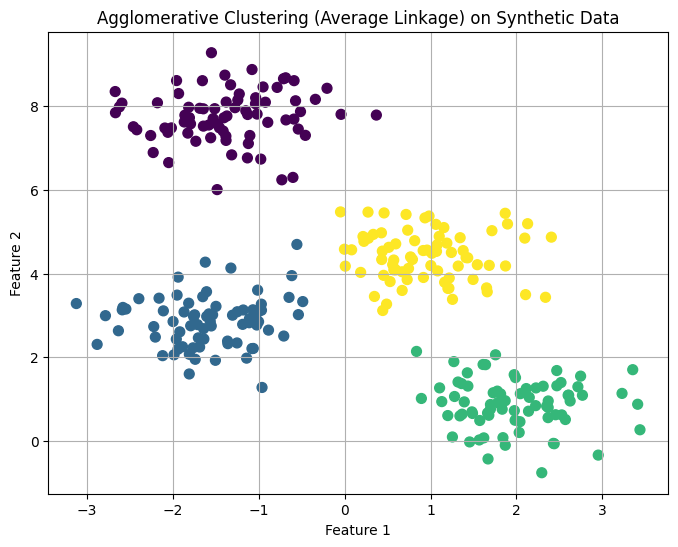

In [26]:
# prompt:  Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
# Visualize clusters

# Generate synthetic data with 4 centers
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply Agglomerative Clustering with 'average' linkage
# We know there are 4 true centers, so let's set n_clusters=4
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
agg_clustering.fit(X)

# Get the predicted labels
predicted_labels = agg_clustering.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=50, cmap='viridis')
plt.title('Agglomerative Clustering (Average Linkage) on Synthetic Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

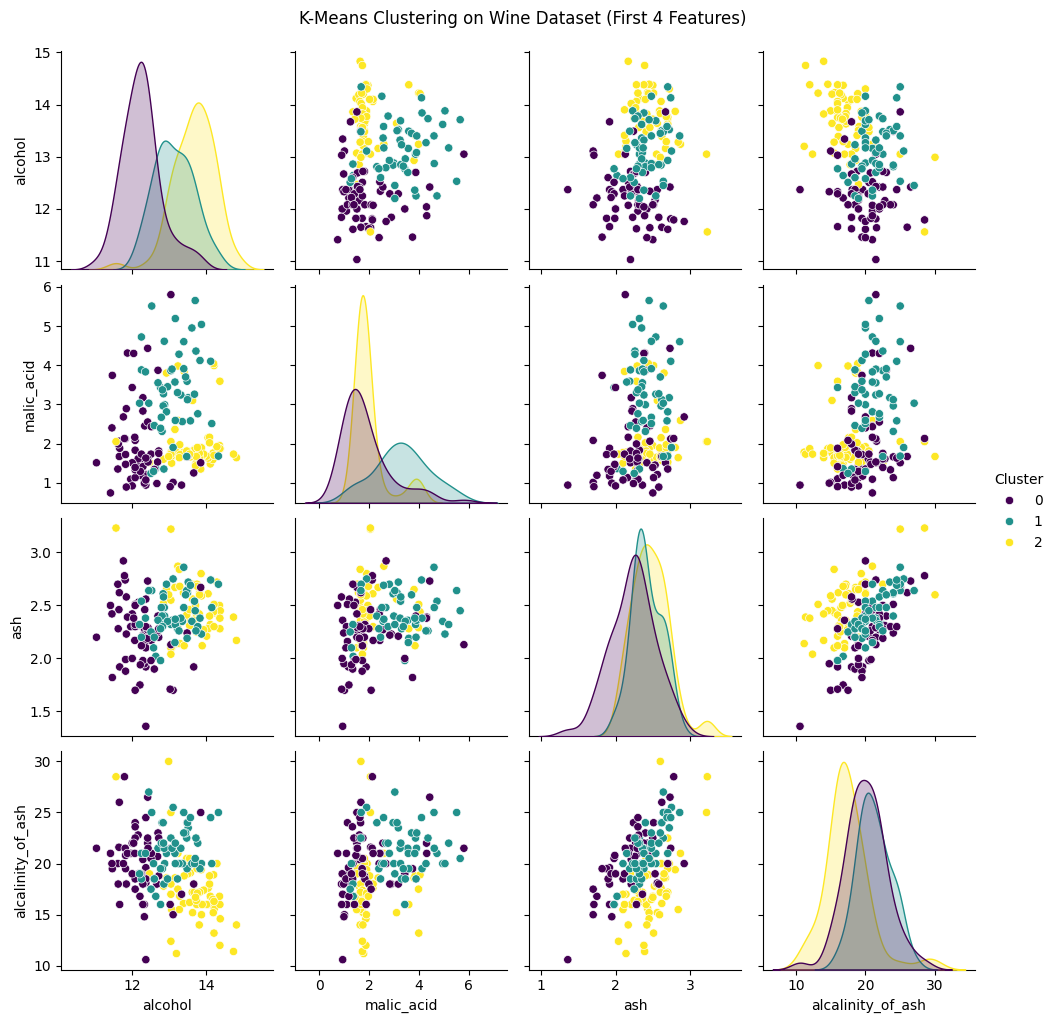

In [28]:
# prompt: Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
# features)

import seaborn as sns
import pandas as pd # Import the pandas library

# Load the Wine dataset
wine = load_wine()
X_wine = wine.data
feature_names = wine.feature_names

# Standardize the features
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

# Apply K-Means clustering (assuming 3 clusters based on the dataset)
kmeans_wine = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_wine.fit(X_wine_scaled)
y_kmeans_wine = kmeans_wine.predict(X_wine_scaled)

# Create a DataFrame for visualization
df_wine = pd.DataFrame(X_wine, columns=feature_names)
df_wine['Cluster'] = y_kmeans_wine

# Visualize the cluster assignments using a seaborn pairplot (first 4 features)
sns.pairplot(df_wine, vars=feature_names[:4], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('K-Means Clustering on Wine Dataset (First 4 Features)', y=1.02) # Adjust title position
plt.show()


DBSCAN Cluster and Noise Point Counts:
Noise points (-1): 23
Cluster 0: 72
Cluster 1: 70
Cluster 2: 67
Cluster 3: 68


<ipython-input-29-a3fad8a23e13>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters_ + 1)


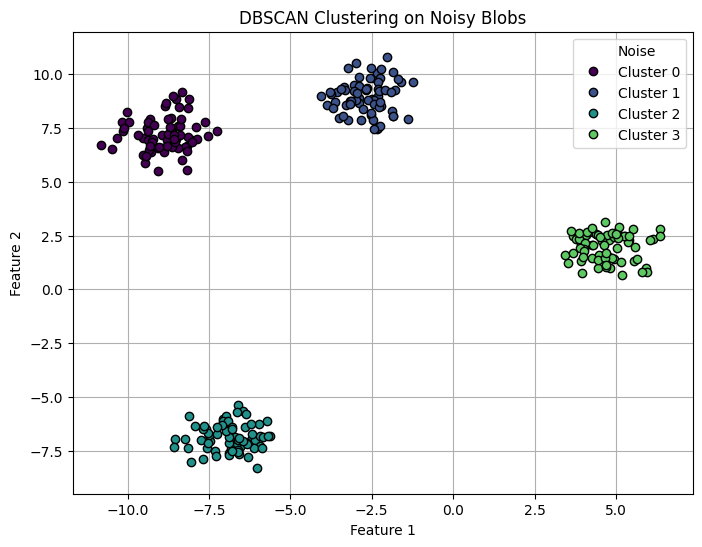

In [29]:
# prompt: Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
# count

# Generate noisy blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# Apply DBSCAN
# You'll likely need to tune eps and min_samples based on the data's density
dbscan = DBSCAN(eps=0.6, min_samples=5) # Example parameters, tune as needed
clusters = dbscan.fit_predict(X)

# Count the number of samples in each cluster and noise points
unique_labels, counts = np.unique(clusters, return_counts=True)

print("DBSCAN Cluster and Noise Point Counts:")
for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"Noise points (-1): {count}")
    else:
        print(f"Cluster {label}: {count}")

# Optional: Visualize the clustering result
plt.figure(figsize=(8, 6))

# Use a colormap that includes a distinct color for noise (-1)
n_clusters_ = len(unique_labels) - (1 if -1 in unique_labels else 0)
cmap = plt.cm.get_cmap('viridis', n_clusters_ + 1)

for k in unique_labels:
    if k == -1:
        # Plot noise points with a distinct color and marker
        color = 'black'
        marker = 'x'
        label = 'Noise'
        size = 50
    else:
        # Plot cluster points
        color = cmap(k) # Use colormap for clusters
        marker = 'o'
        label = f'Cluster {k}'
        size = 30

    class_member_mask = (clusters == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=color,
             markeredgecolor='k' if k != -1 else 'none', markersize=size/5, label=label)

plt.title('DBSCAN Clustering on Noisy Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


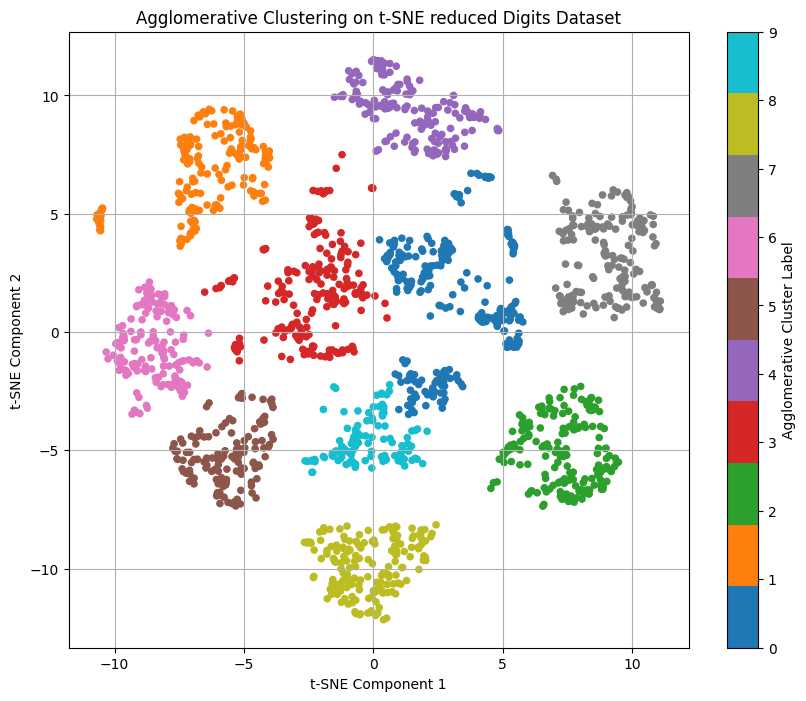

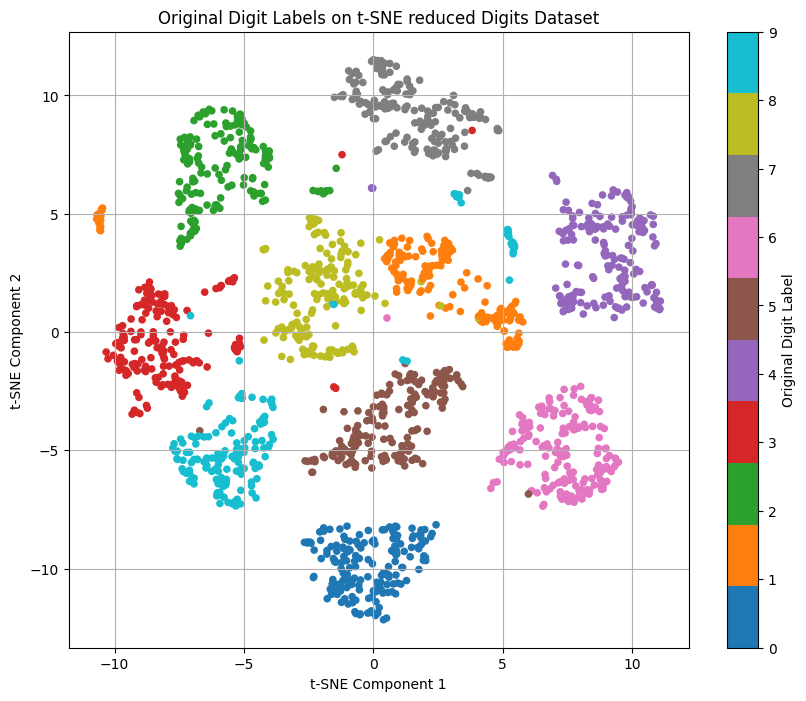

In [30]:
# prompt:  Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
# clusters.

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target # Original labels for comparison later

# Reduce the data to 2 dimensions using t-SNE
# perplexity: related to the number of nearest neighbors used in the algorithm.
# n_iter: Maximum number of iterations for the optimization.
# learning_rate: controls the step size in the optimization.
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto',
            perplexity=30, n_iter=300) # Example parameters, tune as needed
X_tsne = tsne.fit_transform(X)

# Apply Agglomerative Clustering to the t-SNE reduced data
# We know there are 10 digits (0-9), so we set n_clusters=10
# linkage: criterion used to merge clusters (e.g., 'ward', 'complete', 'average', 'single')
agg_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
agg_clustering.fit(X_tsne)

# Get the predicted labels from Agglomerative Clustering
predicted_labels = agg_clustering.labels_

# Visualize the clusters in 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predicted_labels, s=20, cmap='tab10')

plt.title('Agglomerative Clustering on t-SNE reduced Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Agglomerative Cluster Label')
plt.grid(True)
plt.show()

# Optional: Visualize colored by the original digit labels on the t-SNE data for comparison
plt.figure(figsize=(10, 8))
scatter_original = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, s=20, cmap='tab10')
plt.title('Original Digit Labels on t-SNE reduced Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter_original, label='Original Digit Label')
plt.grid(True)
plt.show()